In [1]:
import otter
# nb_name should be the name of your notebook without the .ipynb extension
nb_name = "p11"
py_filename = nb_name + ".py"
grader = otter.Notebook(nb_name + ".ipynb")

In [2]:
import p11_test

# Project 11: Analyzing Stars and Planets

# Learning Objectives:

In this project, you will demonstrate how to:
    
* analyze the data from P10,
* make scatter plots using `matplotlib`,
* remove outliers to make the plots more useful,
* use recursion to gather new data.

**Please go through [Lab-P11](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/tree/main/lab-p11) before working on this project.** The lab introduces some important techniques related to this project.

## Note on Academic Misconduct:

**IMPORTANT**: P10 and P11 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P10, you have to sustain that partnership until end of P11. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/s23/syllabus.html).

## Testing your code:

Along with this notebook, you must have downloaded the files `p11_test.py` and `p11_plots.json`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

## Setup:

In P11, you will be analyzing the same dataset that you parsed in P10. You can either copy/paste the `data` directory to your P11 directory, or download the `data.zip` file provided with this project, and extract it. In addition to the `data` directory, you will also need to download additional datasets for p11. You must download `broken_data.zip` and extract it. You must extract the contents of the directory `broken_data` into the same directory which contains the `data` directory, `p11.ipynb`, `p11_test.py`, and `p11_plots.json`.

You need to make sure that the project files are stored in the following structure:

```
+-- p11.ipynb
+-- p11_test.py
+-- p11_plots.json
+-- data
|   +-- .DS_Store
|   +-- .ipynb_checkpoints
|   +-- mapping_1.json
|   +-- mapping_2.json
|   +-- mapping_3.json
|   +-- mapping_4.json
|   +-- mapping_5.json
|   +-- planets_1.csv
|   +-- planets_2.csv
|   +-- planets_3.csv
|   +-- planets_4.csv
|   +-- planets_5.csv
|   +-- stars_1.csv
|   +-- stars_2.csv
|   +-- stars_3.csv
|   +-- stars_4.csv
|   +-- stars_5.csv
+-- broken_data
|   +-- .DS_Store
|   +-- .ipynb_checkpoints
|   +-- hds
|   |   +-- .ipynb_checkpoints
|   |   +-- hd_1000s
|   |   |   +-- hd_10000s.json
|   |   +-- others.json
|   +-- k2s.json
|   +-- keplers
|   |   +-- kepler_100s
|   |   |   +-- kepler_100s
|   |   |   |   +-- kepler_100s
|   |   |   |   |   +-- kepler_100s.json
|   |   |   |   +-- others.json
|   |   |   +-- kepler_200s
|   |   |   |   +-- .ipynb_checkpoints
|   |   |   |   +-- kepler_220s.json
|   |   |   |   +-- kepler_290s.json
|   |   |   |   +-- others
|   |   |   |   |   +-- others.json
|   |   |   +-- others.json
|   |   +-- kepler_10s
|   |   |   +-- kepler_80s
|   |   |   |   +-- kepler_80s.json
|   |   |   +-- others
|   |   |   |   +-- kepler_20s.json
|   |   |   |   +-- kepler_30s.json
|   |   |   |   +-- others.json
|   |   +-- others
|   |   |   +-- .DS_Store
|   |   |   +-- others.json
|   +-- others
|   |   +-- .DS_Store
|   |   +-- gjs.json
|   |   +-- others.json
|   |   +-- tois
|   |   |   +-- tois.json
```

Make sure that **all** files are stored in this **exact** file structure. Otherwise, then there is a possibility that your code will **fail on Gradescope** even after passing local tests.

## Project Description:

You have already parsed the data in the `data` directory in P10. You will now dive deeper by analyzing this data and arrive at some exciting conclusions about various planets and stars outside our Solar System. You will also use recursion to retrieve data from the broken JSON file in the `data` directory, and ask some interesting questions about the data.

## Project Requirements:

You **may not** hardcode indices in your code, unless the question explicitly says so. If you open your `.csv` files with Excel, manually count through the rows and use this number to loop through the dataset, this is also considered as hardcoding. We'll **manually deduct** points from your autograder score on Gradescope during code review.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, the Gradescope autograder will **deduct** points from your public test score, even if the way you did it produced the correct answer.

Required Functions:
- `get_all_paths_in`
- `get_surface_gravity`
- `get_distances_to_star`
- `get_liquid_water_distances`
- `get_surface_temperatures`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, the Gradescope autograder will **deduct** points from your public test score, even if the way you did it produced the correct answer.

Required Data Structures:
- `Star` (**namedtuple**)
- `stars_dict` (**dictionary** mapping **strings** to `Star` objects)
- `Planet` (**namedtuple**)
- `planets_list` (**list** of `Planet` objects)
- `star_classes` (**dictionary**)
- `all_planets_list` (**list** of `Planet` objects)

In addition, you are also **required** to follow the requirements below:

* You are **not** allowed to use **modules** like `pandas` to answer the questions in this project.
* You **must** properly **label** the axes of all your **plots**.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.
* Do **not** leave in irrelevant output or test code that we didn't ask for.

We will **manually deduct** points if you do **not** follow these guidelines.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/blob/main/p11rubric.md).

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [3]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import os
import json
from collections import namedtuple
import matplotlib.pyplot as plt
import csv
import statistics
import math

### Loading in the Stars and Planets:

Before we can analyze the data in the `data` directory, you must first copy/paste all the functions and data strucutres you created in P10 to parse the data.

In [4]:
# copy/paste the definition of the namedtuple 'Star' here
star_attributes = ['spectral_type',
                  'stellar_effective_temperature',
                  'stellar_radius',
                  'stellar_mass',
                  'stellar_luminosity',
                  'stellar_surface_gravity',
                  'stellar_age']

Star = namedtuple("Star", star_attributes)

In [5]:
# copy/paste the definition of the function 'process_csv' here
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

In [6]:
# copy/paste the definition of the function 'star_cell' here
stars_1_csv = process_csv(os.path.join("data", "stars_1.csv"))
stars_header = stars_1_csv[0]
stars_1_rows = stars_1_csv[1:]

def star_cell(row_idx, col_name, stars_rows, header=stars_header):
    col_idx = header.index(col_name)
    val = stars_rows[row_idx][col_idx]

    if val == '':
        return None

    else:
        if col_name == "Stellar Effective Temperature [K]" or col_name == "Stellar Radius [Solar Radius]" or col_name == "Stellar Mass [Solar mass]" or col_name == "Stellar Luminosity [log(Solar)]" or col_name == "Stellar Surface Gravity [log10(cm/s**2)]" or col_name == "Stellar Age [Gyr]":
            return float(val)
        return val

In [7]:
# copy/paste the definition of the function 'get_stars' here
def get_stars(star_file):
    stars_csv = process_csv(os.path.join("data", star_file))
    stars_header = stars_csv[0]
    stars_rows = stars_csv[1:]
    
    stars_dict = {}
    
    for row_idx in range(len(stars_rows)):
        star_name = star_cell(row_idx, 'Name', stars_rows)
        spectral_type = star_cell(row_idx, 'Spectral Type', stars_rows)
        stellar_effective_temperature = star_cell(row_idx, 'Stellar Effective Temperature [K]', stars_rows)

        stellar_radius = star_cell(row_idx, 'Stellar Radius [Solar Radius]', stars_rows)

        stellar_mass = star_cell(row_idx, 'Stellar Mass [Solar mass]', stars_rows)

        stellar_luminosity = star_cell(row_idx, 'Stellar Luminosity [log(Solar)]', stars_rows)

        stellar_surface_gravity = star_cell(row_idx, 'Stellar Surface Gravity [log10(cm/s**2)]', stars_rows)

        stellar_age = star_cell(row_idx, 'Stellar Age [Gyr]', stars_rows)

        star = Star(spectral_type, stellar_effective_temperature, stellar_radius, \
                      stellar_mass, stellar_luminosity, \
                      stellar_surface_gravity, stellar_age)

        stars_dict[star_name] = star

    return stars_dict

In [8]:
# copy/paste the definition of the dictionary 'stars_dict' here
all_files = os.listdir('data')

files_in_data = [item for item in all_files if not item.startswith(".")]

files_in_data.sort(reverse = True)

files_in_data


stars_dict = {}

stars_list = []

for file in files_in_data:
    if file.startswith("stars"):
        file_name = file
        stars_list.append(file_name)



for stars_file in stars_list:
    new_dict = get_stars(stars_file)
    stars_dict.update(new_dict)

In [9]:
# copy/paste the definition of the namedtuple 'Planet' here
planet_attributes = ['planet_name',
                     'host_name',
                     'discovery_method',
                     'discovery_year',
                     'controversial_flag',
                     'orbital_period',
                     'planet_radius',
                     'planet_mass',
                     'semi_major_radius',
                     'eccentricity',
                     'equilibrium_temperature',
                     'insolation_flux']

Planet = namedtuple("Planet", planet_attributes)

In [10]:
# copy/paste the definition of the function 'read_json' here
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)

In [11]:
# copy/paste the definition of the function 'planet_cell' here
planets_1_csv = process_csv(os.path.join("data", 'planets_1.csv'))
planets_header = planets_1_csv[0]
planets_1_rows = planets_1_csv[1:]

def planet_cell(row_idx, col_name, planets_rows, header=planets_header):
    col_idx = header.index(col_name)
    val = planets_rows[row_idx][col_idx]
    if val == '':
        return None
    if col_name in ["Controversial Flag"]:
        if val == "1":
            return True
        else:
            return False
    if col_name == "Discovery Year":
        return int(val)
    if col_name in ["Orbital Period [days]", "Planet Radius [Earth Radius]", "Planet Mass [Earth Mass]", "Orbit Semi-Major Axis [au]", "Eccentricity", "Equilibrium Temperature [K]", "Insolation Flux [Earth Flux]"]:
        return float(val)
    else:
        return val

In [12]:
# copy/paste the definition of the function 'get_planets' here
def get_planets(planet_file, mapping_file):

    planet_csv = process_csv(planet_file)
    planet_header = planet_csv[0]
    planet_rows = planet_csv[1:]
    
    try:
        mapping_json = read_json(mapping_file)
    except json.JSONDecodeError:
        return []
    
    planet_list = []
    
    
    for row_idx in range(len(planet_rows)):
        try:
            planet_name = planet_cell(row_idx, 'Planet Name', planet_rows)

            host_name = mapping_json[planet_cell(row_idx, "Planet Name", planet_rows)]

            discovery_method = planet_cell(row_idx, 'Discovery Method', planet_rows)

            discovery_year = planet_cell(row_idx, 'Discovery Year', planet_rows)

            controversial_flag = planet_cell(row_idx, 'Controversial Flag', planet_rows)

            orbital_period = planet_cell(row_idx, 'Orbital Period [days]', planet_rows)

            planet_radius = planet_cell(row_idx, 'Planet Radius [Earth Radius]', planet_rows)

            planet_mass = planet_cell(row_idx, 'Planet Mass [Earth Mass]', planet_rows)

            semi_major_radius = planet_cell(row_idx, 'Orbit Semi-Major Axis [au]', planet_rows)

            eccentricity = planet_cell(row_idx, 'Eccentricity', planet_rows)

            equilibrium_temperature = planet_cell(row_idx, 'Equilibrium Temperature [K]', planet_rows)

            insolation_flux = planet_cell(row_idx, 'Insolation Flux [Earth Flux]', planet_rows)


            planet = Planet(planet_name, host_name, discovery_method, discovery_year, controversial_flag, \
                  orbital_period, planet_radius, planet_mass, semi_major_radius, eccentricity, \
                  equilibrium_temperature, insolation_flux)

            planet_list.append(planet)
    
        except KeyError:
            continue
        except ValueError:
            continue
        except IndexError:
            continue
        

    return planet_list

In [13]:
# copy/paste the definition of the list 'planets_list' here
planets_name_list = []

mapping_list = []

planets_list = []

for file in files_in_data:
    if file.startswith("planets"):
        file_name = file
        planets_name_list.append(file_name)
planets_name_list.sort()


for file in files_in_data:
    if file.startswith("mapping"):
        file_name = file
        mapping_list.append(file_name)
mapping_list.sort()



for planets_file in planets_name_list:
    new_list = get_planets(os.path.join("data", planets_file), os.path.join("data", mapping_list[planets_name_list.index(planets_file)]))
    planets_list.extend(new_list)

You used two functions `plot_scatter` and `plot_scatter_multiple` in Lab-P11 to create your **scatter plots**. These functions are again provided for you here to use in P11.

In [14]:
# remember to import matplotlib.pyplot as plt at the top of the notebook to make these functions work

def plot_scatter(x_data, y_data, x_label='x axis', y_label='y axis', c=None, s=7):
    plt.scatter(x_data, y_data, c=c, s=s)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
def plot_scatter_multiple(x_data_dict, y_data_dict, x_label='x axis', y_label='y axis'):
    legend_values = list(x_data_dict.keys())
    for key in x_data_dict:
        plt.scatter(x_data_dict[key], y_data_dict[key], s=7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_values)

### Verifying Laws of Nature:

We will now use our dataset to verify some well-known laws of nature. Unless specified otherwise, you **must** use `stars_dict` and `planets_list` to access all data.

#### Kepler's Third Law:

We will first verify [Kepler's Third Law](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Third_law). This law states that the **square** of the `orbital_period` of each planet in a solar system is directly proportional to the **cube** of the `semi_major_radius` of its orbit around its host star.

Since this law relates only to planets that orbit the same host star, we will verify this law using the several planets orbiting around a star named *GJ 9827*.

**Question 1:** Compute the **ratio** of the **square** of the `orbital_period` to the **cube** of the `semi_major_radius` of each planet orbiting the star *GJ 9827*.

Your output **must** be a **list** of **floats**. You may **assume** that the planets orbiting this star do not have any missing `orbital_period` or `semi_major_radius` data.

In [15]:
# compute and store the answer in the variable 'ratios_gj9827', then display it
ratios_gj9827 = []
for i in range(len(planets_list)):
    if planets_list[i].host_name == "GJ 9827":
        ratio = (planets_list[i].orbital_period ** 2) / (planets_list[i].semi_major_radius ** 3)
        ratios_gj9827.append(ratio)

ratios_gj9827

[219971.31454007205, 220096.664979353, 220049.70437075992]

In [16]:
grader.check("q1")

q1 results: All test cases passed!

The **ratios** of the three stars in this system appear to be very close to each other. It will be useful if we could quantify exactly how close these ratios are to each other. One way to do that would to be compute the [coefficient of variance](https://en.wikipedia.org/wiki/Coefficient_of_variation), which is defined as the **standard deviation** divided by the **mean** of a sequence of numbers. A low value would imply that the numbers are very **close** to each other.

**Question 2:** Compute the **coefficient of variance** of the **list** `ratios_gj9827`.

**Hint:** You can compute the **standard deviation** and the **mean** of a **list** of numbers using the `statistics.stdev` and `statistics.mean` functions inside the `statistics` module. To do this, you must first **import** the `statistics` module. You can read the documentation for the `statistics.stdev` and `statistics.mean` functions by creating a new cell and using `help(statistics.mean)` and `help(statistics.mean)`.

In [17]:
# compute and store the answer in the variable 'coeff_gj9827', then display it
stdev = statistics.stdev(ratios_gj9827)
mean = statistics.mean(ratios_gj9827)

coeff_gj9827 = stdev / mean
coeff_gj9827

0.00028780552063892534

In [18]:
grader.check("q2")

q2 results: All test cases passed!

As we can see, the **coefficient of variance** is indeed very low. This lends credibility to Kepler's Third Law. However, there is yet more we can do with this data. After we adjust for the units used in our dataset, we find that Kepler's Third Law predicts the following:

$$\texttt{stellar mass} = \frac{133408}{\texttt{ratio}}$$

where $\texttt{ratio}$ is the **mean** of the ratios of the **square** of the `orbital_period` to the **cube** of the `semi_major_radius` computed above, and $\texttt{stellar mass}$ is the mass of the planets' host star.

We can therefore check how close this **predicted** `stellar_mass` is to the **actual** `stellar_mass` of the star.

**Question 3:** Compute the percentage change of the **predicted** `stellar_mass` from the **actual** `stellar_mass` of the star *GJ 9827*.

You **must** compute the **predicted** `stellar_mass` as the number *133408* divided by the **mean** of the ratios of the three planets computed in Question 1. You **must** find the **actual** `stellar_mass` by accessing the correct attribute of the `Star` object of *GJ 9827*. The percentage change can be computed as:

$$\texttt{percent change} = \frac{\texttt{predicted stellar mass} - \texttt{actual stellar mass}}{\texttt{actual stellar mass}} \times 100$$

In [19]:
# compute and store the answer in the variable 'percentage_change', then display it
predicted_stellar_mass = 133408 / mean

actual_stellar_mass = None

for star in stars_dict:
    if star == "GJ 9827":
        actual_stellar_mass = stars_dict[star].stellar_mass

percentage_change = (predicted_stellar_mass - actual_stellar_mass) / actual_stellar_mass * 100

percentage_change

-0.607886435301983

In [20]:
grader.check("q3")

q3 results: All test cases passed!

#### Stefan-Boltzmann Law:

We will now verify the [Stefan-Boltzmann Law](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law). This law states that the `insolation_flux` of a *black body* is directly proportional to the **fourth** power of the `equilibrium_temperature`. In our dataset, we have the `insolation_flux` and `equilibrium_temperature` data of the `Planet` objects. So, we can verify how well this law is obeyed by the planets in our dataset.

**Question 4:** Create a **scatter plot** representing the `insolation_flux` (on the **x-axis**) against the **fourth power** of the `equilibrium_temperature` (on the **y-axis**) of each `Planet` object in `planets_list`.

You **must** ignore all `Planet` objects with **missing** `insolation_flux`, or `equilibrium_temperature` data.

You **must** first compute two **lists** containing the **insolation_flux**, and the fourth power of the **equilibrium_temperature** of each `Planet` object (which has all the data available). Then, you **must** use `plot_scatter` to plot the **insolation_flux** against the fourth power of the **equilibrium_temperature**.

In [21]:
# first compute and store the lists 'flux_list', and 'temp_4th_power_list'
# do NOT plot just yet
flux_list = [planets_list[i].insolation_flux for i in range(len(planets_list)) if planets_list[i].insolation_flux != None and planets_list[i].equilibrium_temperature != None]

temp_4th_power_list = [planets_list[j].equilibrium_temperature ** 4 for j in range(len(planets_list)) if planets_list[j].insolation_flux != None and planets_list[j].equilibrium_temperature != None]


In [22]:
grader.check("q4")

q4 results: All test cases passed!

Now, **plot** `flux_list` and `temp_4th_power_list` as **scatter plot** with the **x-axis** labelled *Insolation Flux*, and the **y-axis** labelled *(Equilibrium Temperature)\*\*4*.

**Important Warning:** `p11_test.py` can check that the **lists** are correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>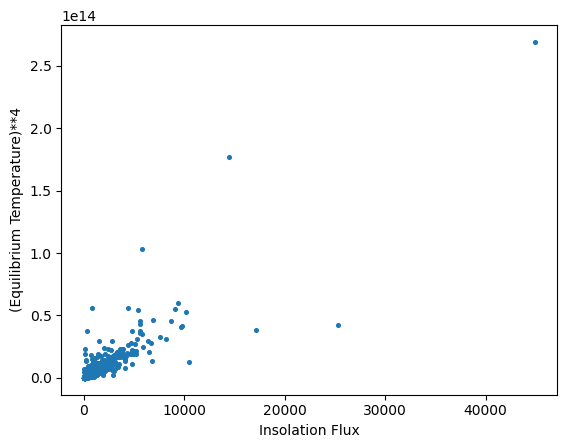</div>

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot above to reduce the size of your notebook. Make sure your plot matches the plot above, before you do so.

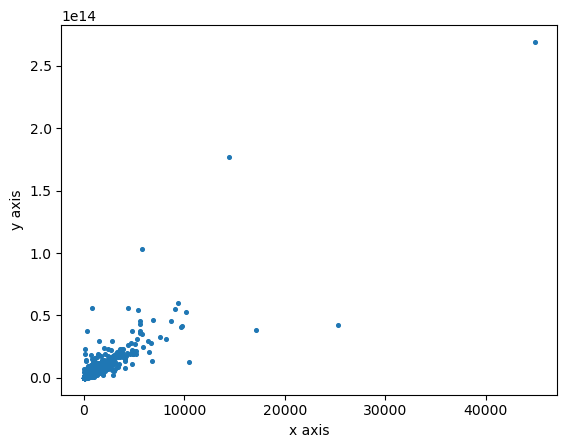

In [23]:
# create a scatter plot using 'flux_list' and 'temp_4th_power_list'
plot_scatter(flux_list, temp_4th_power_list)

**Food for thought:** Why does this graph look so strange with all the points bunched up near the bottom-left corner?

In [24]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 5:** Create the same **scatter plot** as above, but **exclude** planets with `insolation_flux` **more than** *7000*.

You **must** ignore all `Planet` objects with **missing** `insolation_flux`, or `equilibrium_temperature` data. You **must** also exclude all `Planet` objects with `insolation_flux` more than *7000*.

You **must** first compute two **lists** containing the **insolation_flux**, and the fourth power of the **equilibrium_temperature** of each `Planet` object (which has all the data available). Then, you **must** use `plot_scatter` to plot the **insolation_flux** against the fourth power of the **equilibrium_temperature**.

In [25]:
# first compute and store the lists 'flux_list_no_outliers', and 'temp_4th_power_list_no_outliers'
# do NOT plot just yet
flux_list_no_outliers = [planets_list[i].insolation_flux for i in range(len(planets_list)) if planets_list[i].insolation_flux != None and planets_list[i].equilibrium_temperature != None and planets_list[i].insolation_flux <= 7000]

temp_4th_power_list_no_outliers = [planets_list[j].equilibrium_temperature ** 4 for j in range(len(planets_list)) if planets_list[j].insolation_flux != None and planets_list[j].equilibrium_temperature != None and planets_list[j].insolation_flux <= 7000]


In [26]:
grader.check("q5")

q5 results: All test cases passed!

Now, **plot** `flux_list_no_outliers` and `temp_4th_power_list_no_outliers` as **scatter plot** with the **x-axis** labelled *Insolation Flux*, and the **y-axis** labelled *(Equilibrium Temperature)\*\*4*.

**Important Warning:** `p11_test.py` can check that the **lists** are correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>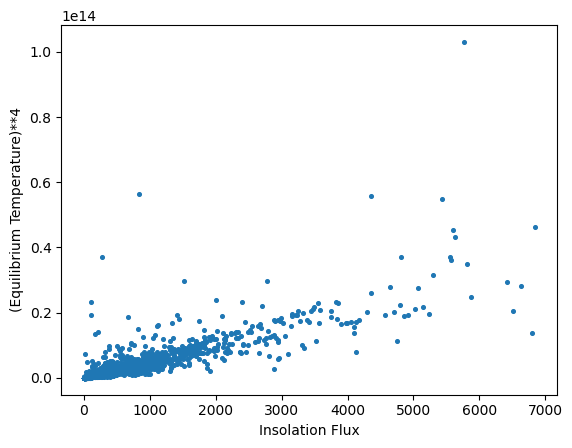</div>

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot above to reduce the size of your notebook. Make sure your plot matches the plot above, before you do so.

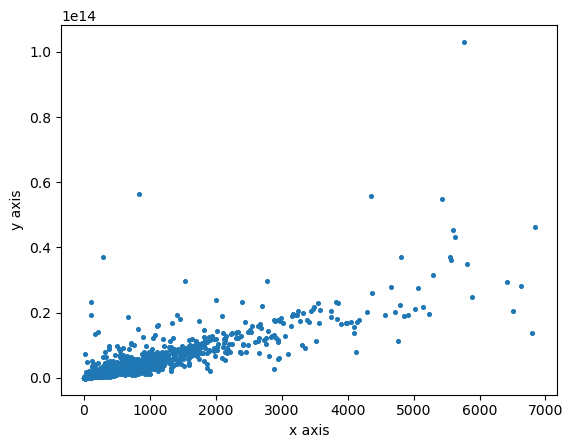

In [27]:
# Create a scatter plot using 'flux_list_no_outliers' and 'temp_4th_power_list_no_outliers'
plot_scatter(flux_list_no_outliers, temp_4th_power_list_no_outliers)

**Food for thought:** Does the relationship between **insolation flux** and the **fourth power of the equilibrium temperature** appear to be **linear** as predicted by the Stefan-Boltzmann Law? Can you explain why the graph isn't perfectly linear?

In [28]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


### Stellar Evolution:

[Stellar Evolution](https://en.wikipedia.org/wiki/Stellar_evolution) is a description of the way that stars change with time. The primary factor determining how a star evolves is its `stellar_mass`. Depending on the `stellar_mass` of each `Star`, astronomers can predict how the `Star` will end up. A `Star` whose `stellar_mass` is $\geq 0.3$ and $< 8$ times the mass of the Sun will become a [Red Giant](https://en.wikipedia.org/wiki/Red_giant), while a `Star` whose `stellar_mass` is $\geq 8$ and $< 10.5$ times the mass of the Sun will become a [White Dwarf](https://en.wikipedia.org/wiki/White_dwarf). A `Star` that is even bigger will end up as a [Neutron Star](https://en.wikipedia.org/wiki/Neutron_star).

### Data Structure 1: `star_classes`

You **must** now classify the `Star` objects in `stars_dict` using their `stellar_mass`. You **must** create a **dictionary** `star_classes` with the **keys**: `Red Giant`, `White Dwarf`, and `Neutron Star`. The **value** of each **key** must be a **list** of **strings** containing the **names** of the `Star` objects.

You **must** **ignore** `Star` objects for which we do not have `stellar_mass` data or have `stellar_mass` **less** than *0.3* Solar masses.

**Hint:** Recall that the `stellar_mass` data already uses units of *Solar masses*. So, a `stellar_mass` of *1* means that the `Star` object has the same mass as the Sun, and a `stellar_mass` of 2 means the `Star` object has twice the mass of the Sun, and so on.

In [29]:
# define the variable 'star_classes' here
# but do NOT display
star_classes = {}

for star in stars_dict:
    if stars_dict[star].stellar_mass != None and stars_dict[star].stellar_mass >= 0.3:
        if stars_dict[star].stellar_mass >= 0.3 and stars_dict[star].stellar_mass < 8:
            if "Red Giant" not in star_classes:
                star_classes["Red Giant"] = []
            star_classes["Red Giant"].append(star)
        elif stars_dict[star].stellar_mass >= 8 and stars_dict[star].stellar_mass < 10.5:
            if "White Dwarf" not in star_classes:
                star_classes["White Dwarf"] = []
            star_classes["White Dwarf"].append(star)
        elif stars_dict[star].stellar_mass >= 10.5:
            if "Neutron Star" not in star_classes:
                star_classes["Neutron Star"] = []
            star_classes["Neutron Star"].append(star)

# star_classes

You can **verify** that you have defined `star_classes` correctly by checking that there are *3843* Red Giants, *3* White Dwarfs, and *1* Neutron Star in `star_classes`.

**Question 6:** What is the **average** `stellar_luminosity` of each class of `Star` objects in `star_classes`?

Your output **must** be a **dictionary** mapping the class of the star to the **average** `stellar_luminosity` value of all `Star` objects of that class. You **must** ignore the `Star` objects with **missing** `stellar_luminosity` data.

The expected output of this question is:

```python
{'Red Giant': -0.01889128094725505,
 'White Dwarf': 2.787333333333333,
 'Neutron Star': 2.86}
```

In [30]:
# compute and store the answer in the variable 'star_classes_avg_lum', then display it

# TODO: initialize 'star_classes_avg_lum'
# TODO: loop through each 'star_class' in 'star_classes'
    # TODO: loop through each 'star' in the 'star_class'
        # TODO: skip 'star' if 'stellar_luminosity' data is missing
        # TODO: for the remaining stars, compute the mean of the 'stellar_luminosity'
    # TODO: add the mean luminosity to 'star_classes_avg_lum'
    
# TODO: display 'star_classes_avg_lum'

star_classes_avg_lum = {}

for star_type in star_classes:
    total_lum = 0
    count = 0
    for star in star_classes[star_type]:
        if stars_dict[star].stellar_luminosity != None:
            total_lum += stars_dict[star].stellar_luminosity
            count += 1
    avg_lum = total_lum / count
    if star_type not in star_classes_avg_lum:
        star_classes_avg_lum[star_type] = avg_lum

star_classes_avg_lum

{'Red Giant': -0.018891280947255014,
 'White Dwarf': 2.787333333333333,
 'Neutron Star': 2.86}

In [31]:
grader.check("q6")

q6 results: All test cases passed!

**Food for thought:** Recall that the `stellar_luminosity` values of the `Star` objects are represented in units of the logarithm of the Sun's luminosity. What does this difference in `stellar_luminosity` signify?

In [32]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


Just as the different classes of `Star` objects have different **average luminosities**, they also have different **average densities**. This difference will be easier to visualize as a **scatter plot**.

However, before you can do that, there is a minor hurdle you need to overcome - we do **not** have the *stellar density* data available for the `Star` objects in our dataset. However, we do have `stellar_mass` and `stellar_radius` data, which allows us to **compute** the *stellar density*. Since the `stellar_mass` and `stellar_radius` data is stored in units of the Sun's mass and radius respectively, we can compute the *stellar density* (i.e., density of the `Star` in units of the Sun's density) as follows:

$$\texttt{stellar density} = \frac{\texttt{stellar mass}}{(\texttt{stellar radius})^{3}}.$$

**Question 7:** Create a **scatter plot** representing the *stellar density* (on the **x-axis**) against the `stellar_luminosity` (on the **y-axis**) of each `Star` object of **each class** in `star_classes`.

You **must** ignore all `Star` objects with **missing** `stellar_mass`, `stellar_radius`, or `stellar_luminosity` data.

You **must** first compute two **dictionaries**. The **keys** of both dictionaries must be the different **star classes**, and the corresponding values must be the **list** of **densities** and **list** of **luminosities** of `Star` objects of that **star class**. Then, you **must** use `plot_scatter_multiple` to plot the **density** against the **luminosity** of each **star class**.

In [33]:
# first compute and store the dictionaries 'density_dict', and 'lum_dict'
# do NOT plot just yet

# TODO: initialize the two dictionaries 'density_dict', and 'lum_dict'
# TODO: loop through each 'star_class' in 'star_classes'
    # TODO: add the 'star_class' to 'density_dict' and 'lum_dict'
    # TODO: loop through each 'star' in the 'star_class'
        # TODO: skip 'star' if mass, radius, or luminosity data is missing
        # TODO: otherwise add the luminosity to the correct key of 'lum_dict'
        # TODO: compute the density and add to the correct key of 'density_dict'
density_dict = {}
lum_dict = {}

for star_class in star_classes:
    for star in star_classes[star_class]:
        if stars_dict[star].stellar_mass != None and stars_dict[star].stellar_radius != None and stars_dict[star].stellar_luminosity != None:
            if star_class not in density_dict:
                density_dict[star_class] = []
                lum_dict[star_class] = []
            density_dict[star_class].append(stars_dict[star].stellar_mass / (stars_dict[star].stellar_radius) ** 3)
            lum_dict[star_class].append(stars_dict[star].stellar_luminosity)

# lum_dict

In [34]:
grader.check("q7")

q7 results: All test cases passed!

Now, **plot** `density_dict` and `lum_dict` as **scatter plot** with the **x-axis** labelled *Density*, and the **y-axis** labelled *Luminosity*.

**Important Warning:** `p11_test.py` can check that the **dictionaries** are correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>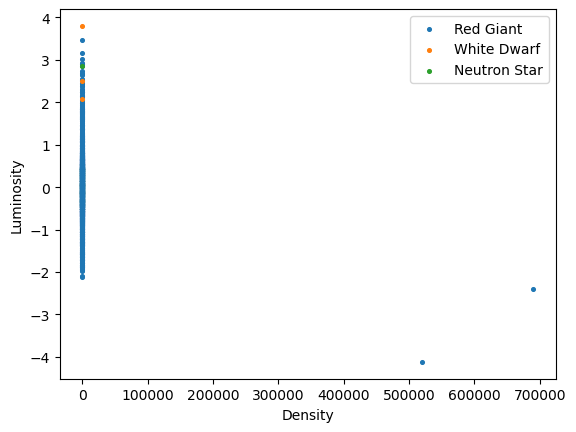</div>

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot above to reduce the size of your notebook. Make sure your plot matches the plot above, before you do so.

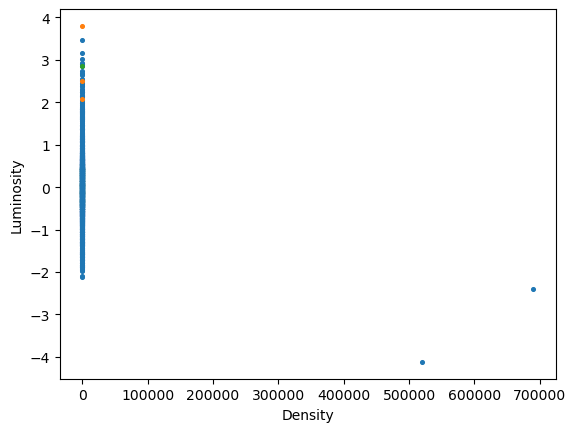

In [35]:
# plot 'density_dict' and 'lum_dict'

for key in density_dict.keys():
    plot_scatter(density_dict[key], lum_dict[key], "Density", "Luminosity")

**Food for thought:** As you can see, there are **two** extreme outliers with a very high density. If you are interested, you can try to find out the names of these stars, and why they have such extremely high densities (and low luminosities). What (incorrect) assumption did we make when we classified the `Star` objects in `star_classes`? Can you suggest a more accurate way of classifying the stars now?

In [36]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


As you can see, almost all the `Star` objects have low *stellar density*, and the presence of a few extreme outliers is obscuring our view of the other `Star` objects. In fact, it turns out that there are only *27* `Star` objects in the dataset with a *stellar density* **greater than** *25*. We could get a much clearer view of the relationship between *stellar density* and `stellar_luminosity` if we did **not** plot these outliers.

**Question 8:** Create the same **scatter plot** as above, but exclude stars with *stellar density* **more than** *25*.

You **must** ignore all `Star` objects with **missing** `stellar_mass`, `stellar_radius`, or `stellar_luminosity` data. You **must** also ignore all `Star` objects with *stellar density* more than *25*.

You **must** first compute two **dictionaries**. The **keys** of both dictionaries must be the different **star classes**, and the corresponding values must be the **list** of **densities** and **list** of **luminosities** of `Star` objects of that **star class**. Then, you **must** use `plot_scatter_multiple` to plot the **density** against the **luminosity** of each **star class**.

In [37]:
# first compute and store the dictionaries 'density_dict_no_outliers', and 'lum_dict_no_outliers'
# do NOT plot just yet
density_dict_no_outliers = {}
lum_dict_no_outliers = {}

for star_class in star_classes:
    for star in star_classes[star_class]:
        if stars_dict[star].stellar_mass != None and stars_dict[star].stellar_radius != None and stars_dict[star].stellar_luminosity != None and (stars_dict[star].stellar_mass / (stars_dict[star].stellar_radius) ** 3) <= 25:
            if star_class not in density_dict_no_outliers:
                density_dict_no_outliers[star_class] = []
                lum_dict_no_outliers[star_class] = []
            density_dict_no_outliers[star_class].append(stars_dict[star].stellar_mass / (stars_dict[star].stellar_radius) ** 3)
            lum_dict_no_outliers[star_class].append(stars_dict[star].stellar_luminosity)

In [38]:
grader.check("q8")

q8 results: All test cases passed!

Now, **plot** `density_dict_no_outliers` and `lum_dict_no_outliers` as **scatter plot** with the **x-axis** labelled *Density*, and the **y-axis** labelled *Luminosity*.

**Important Warning:** `p11_test.py` can check that the **dictionaries** are correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>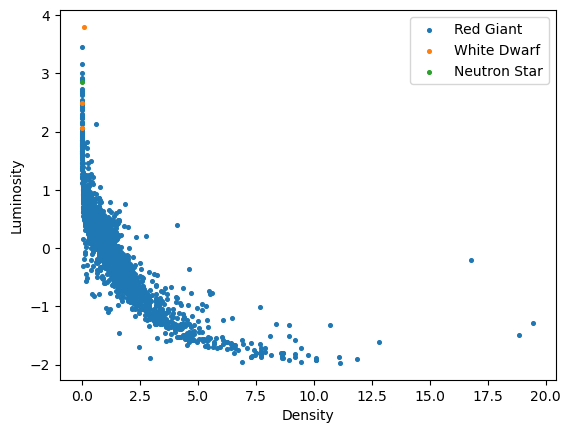</div>

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot above to reduce the size of your notebook. Make sure your plot matches the plot above, before you do so.

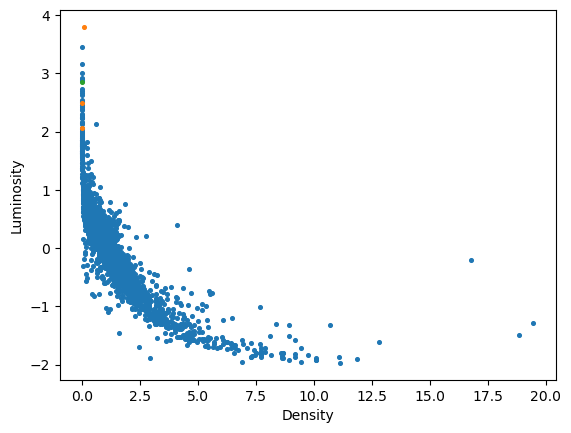

In [39]:
# plot 'density_dict_no_outliers' and 'lum_dict_no_outliers'
for key in density_dict_no_outliers.keys():
    plot_scatter(density_dict_no_outliers[key], lum_dict_no_outliers[key], "Density", "Luminosity")

**Food for thought:** Can you guess the relationship between **density** and **luminosity**? Can you spot the `Star` objects in this graph which will end up as White Dwarfs and Neutron Stars? Do they appear to follow the same relationship as the Red Giants? How do they compare to the outliers you found in Question 7?

In [40]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


### Hertzsprung–Russell Diagram:

The [Hertzsprung–Russell diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) is a scatter plot of stars showing the relationship between the stars' `stellar_luminosity` versus their `stellar_effective_temperature`. The diagram is exceedingly useful for understanding the stellar evolution of stars. We will now use the data we have available to plot this diagram ourselves, so we can better understand stellar evolution.

We want to plot the `stellar_effective_temperature` against the `stellar_luminosity`, but more importantly, we will use the **color** and **size** parameters to represent the `stellar_age` and `stellar_mass` of the `Star` objects as well. This will allow us to see the effects of `stellar_age` and `stellar_mass` on `stellar_effective_temperature` and `stellar_luminosity`.

**Question 9**: Create a **scatter plot** representing the `stellar_effective_temperature` (on the **x-axis**) against the `stellar_luminosity` (on the **y-axis**) of each `Star` object in `stars_dict`. Moreover, represent the `stellar_age` of each `Star` object using the **color** and represent the `stellar_mass` of each `Star` object using the **size** of the star.

You **must** first compute four **lists** containing the `stellar_effective_temperature`, `stellar_luminosity`, `stellar_age` and the `stellar_mass` of each `Star` object (which has **all** the data available). You **must** ignore any `Star` object which has any of these four attributes **missing**. Then, you **must** use `plot_scatter` to plot the `stellar_effective_temperature` against the `stellar_luminosity` with the `stellar_age` as the **color** and the `stellar_mass` as the **size** of the points.

In [41]:
# first compute and store the lists 'temp_list', 'lum_list', 'age_list', and 'mass_list'
# do NOT plot just yet
temp_list = []
lum_list = []
age_list = []
mass_list = []

for star in stars_dict:
    if stars_dict[star].stellar_effective_temperature != None and stars_dict[star].stellar_luminosity != None and stars_dict[star].stellar_age != None and stars_dict[star].stellar_mass != None:
        temp_list.append(stars_dict[star].stellar_effective_temperature)
        lum_list.append(stars_dict[star].stellar_luminosity)
        age_list.append(stars_dict[star].stellar_age)
        mass_list.append(stars_dict[star].stellar_mass)

# temp_list


In [42]:
grader.check("q9")

q9 results: All test cases passed!

Now, **plot** `temp_list` and `lum_list` as **scatter plot** with the **x-axis** labelled *Effective Temperature*, and the **y-axis** labelled *Luminosity*, **colored** using `age_list`, and **sized** using `mass_list`. Your plot should look like this:

<div>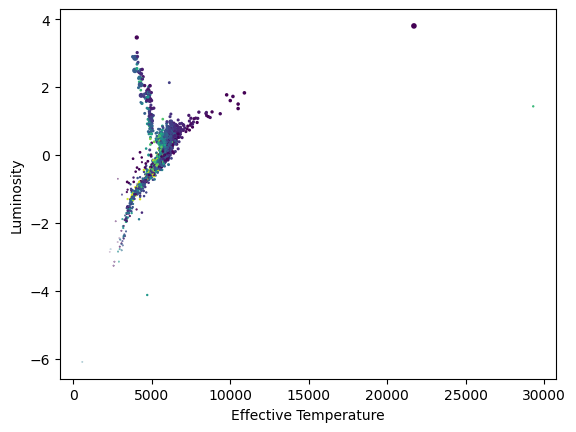</div>

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot above to reduce the size of your notebook. Make sure your plot matches the plot above, before you do so.

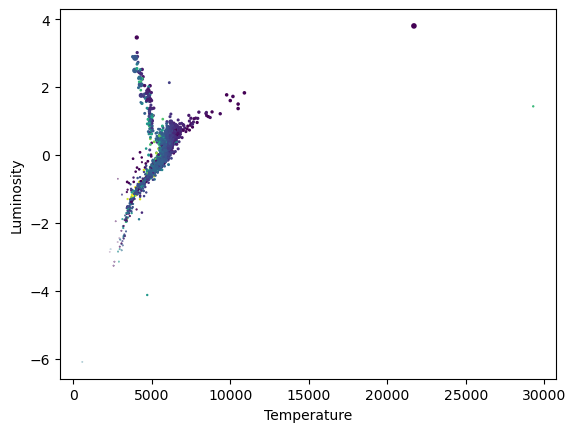

In [43]:
# plot 'temp_list' and 'lum_list' with 'age_list' as colors and 'mass_list' as sizes
plot_scatter(temp_list, lum_list, "Temperature", "Luminosity", c=age_list, s=mass_list)

**Food for thought:** Can you tell if there is any relationship between the **temperature**, **luminosity**, **age**, and **mass** of the stars? You might want to remove the outliers with the extremely high `stellar_effective_temperature` to get a better view of the diagram. What effect does the **age** seem to have on the **temperature**? Recall that a **lighter** color implies that the value is higher, while a **darker** color implies that the value is lower. What effect does the **mass** have?

**Food for thought:** Notice that there are **two distinct** *clusters* of points in this diagram. If you are interested, look up more information on the Hertzsprung–Russell Diagram to understand what these clusters are. 

In [44]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to

### Recursion:

You are not done exploring the dataset, and you have more questions left to answer. However, something more important has happened! We have managed to find the data from the corrupted json file (`mapping_5.json`)!

If you will recall, when we were parsing the files in P10, we found that `mapping_5.json` was **broken**, and we couldn't read it. Therefore, we had no choice but to leave all the planets in `planets_5.csv` out of our analysis. Luckily for you now, the data has shown up intact in the directory `broken_data`. Unfortunately, the data is now no longer stored in a single file, but has been **split up** into **multiple files** and stored in **different subdirectories**.

You will now create a function to help parse all the data stored within this directory.

### Function 1:  `get_all_paths_in(directory)`

You **must** write this function that takes in the **relative path** of a `directory` as its input, and returns a **list** of **relative paths** of all the **files** inside `directory` and its subdirectories.

In other words, if a directory `sample_data` looks like this:
```
+-- sample_data
|   +-- .DS_Store
|   +-- file_1.json
|   +-- sample_1
|   |   +-- .ipynb_checkpoints
|   |   +-- file_2.json
|   |   +-- file_3.json
|   +-- sample_2
|   |   +-- file_4.json
|   |   +-- sample_3
|   |   |   +-- .DS_Store
|   |   |   +-- file_5.json
```

then the output of the function call `get_all_paths_in("sample_data")` **must** be a **list** containing the **relative paths** of the files `file_1.json`, `files_2.json`, `file_3.json`, `file_4.json`, and `file_5.json`.

You **must** **ignore** all files that start with `"."`, and your output **must** be **explicitly** sorted in **alphabetical** order.

**Important Warning:** You **must** write a **recursive** function here. You are **only allowed** to use the functions from the `os` module, which have been covered in lecture. Here is a list of these functions (you will only need a few of these functions to define `get_all_paths_in`):
* `os.mkdir`
* `os.path.join`
* `os.listdir`
* `os.path.exists`
* `os.path.isfile`
* `os.path.isdir`

You may copy/paste this function from Lab-P11 if you finished writing it there.

In [45]:
# define the function 'get_all_paths_in' here

def get_all_paths_in(directory):
    '''get_all_paths_in(directory) recursively 
    explores that directory for any files, 
    and returns a list of paths to 
    files inside that directory'''
    pass # replace with your code
    new_list = []
    
    list_of_list = os.listdir(directory)
    
    for file in list_of_list:
        if file.startswith("."):
            continue
        path = os.path.join(directory, file)
        if os.path.isfile(path):
            new_list.append(path)
        elif os.path.isdir(path):
            new_list.extend(get_all_paths_in(path))
    
    
    
    new_list.sort()
    
    return new_list

**Question 10:** What are the **paths** of the files in the `others` directory of the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_paths_in` function.

**Warning:** Remember that you **must** only use `os.path.join` to create paths.

In [46]:
# compute and store the answer in the variable 'broken_data_others', then display it
broken_data_others = get_all_paths_in(os.path.join("broken_data", "others"))

broken_data_others

['broken_data\\others\\gjs.json',
 'broken_data\\others\\others.json',
 'broken_data\\others\\tois\\tois.json']

In [47]:
grader.check("q10")

q10 results: All test cases passed!

**Question 11:** What are the **paths** of the files in the `kepler_100s` directory of the `keplers` directory of the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_all_paths_in` function.

**Hint:** You can pass multiple **strings** as arguments to `os.path.join` to join them together at the same time. For example, to get the path of the required directory here, you could say
```python
os.path.join("broken_data", "keplers", "kepler_100s")
```

In [48]:
# compute and store the answer in the variable 'broken_data_keplers_kepler_100s', then display it

broken_data_keplers_kepler_100s = get_all_paths_in(os.path.join("broken_data", "keplers", "kepler_100s"))

broken_data_keplers_kepler_100s

['broken_data\\keplers\\kepler_100s\\kepler_100s\\kepler_100s\\kepler_100s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_100s\\others.json',
 'broken_data\\keplers\\kepler_100s\\kepler_200s\\kepler_220s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_200s\\kepler_290s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_200s\\others\\others.json',
 'broken_data\\keplers\\kepler_100s\\others.json']

In [49]:
grader.check("q11")

q11 results: All test cases passed!

**Question 12:** What are the **paths** of the files in the `others` directory of the `kepler_10s` directory of the `keplers` directory of the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_all_paths_in` function.

In [50]:
# compute and store the answer in the variable 'broken_data_keplers_kepler_10s_others', then display it
broken_data_keplers_kepler_10s_others = get_all_paths_in(os.path.join("broken_data", "keplers", "kepler_10s", "others"))

broken_data_keplers_kepler_10s_others

['broken_data\\keplers\\kepler_10s\\others\\kepler_20s.json',
 'broken_data\\keplers\\kepler_10s\\others\\kepler_30s.json',
 'broken_data\\keplers\\kepler_10s\\others\\others.json']

In [51]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13:** What are the **paths** of the files in the `broken_data` directory?

Your output **must** be a **list** of **relative paths**. You **must** answer this question by calling the `get_paths_in` function.

In [52]:
# compute and store the answer in the variable 'broken_data', then display it
broken_data = get_all_paths_in(os.path.join("broken_data"))

broken_data

['broken_data\\hds\\hd_10000s\\hd_10000s.json',
 'broken_data\\hds\\others.json',
 'broken_data\\k2s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_100s\\kepler_100s\\kepler_100s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_100s\\others.json',
 'broken_data\\keplers\\kepler_100s\\kepler_200s\\kepler_220s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_200s\\kepler_290s.json',
 'broken_data\\keplers\\kepler_100s\\kepler_200s\\others\\others.json',
 'broken_data\\keplers\\kepler_100s\\others.json',
 'broken_data\\keplers\\kepler_10s\\kepler_80s\\kepler_80s.json',
 'broken_data\\keplers\\kepler_10s\\others\\kepler_20s.json',
 'broken_data\\keplers\\kepler_10s\\others\\kepler_30s.json',
 'broken_data\\keplers\\kepler_10s\\others\\others.json',
 'broken_data\\keplers\\others\\others.json',
 'broken_data\\others\\gjs.json',
 'broken_data\\others\\others.json',
 'broken_data\\others\\tois\\tois.json']

In [53]:
grader.check("q13")

q13 results: All test cases passed!

### Data Structure 2: `all_planets_list`

We want to read the data that is stored inside the directory `broken_data`. We already have a function `get_planets` (from P10) which can read a CSV file and a JSON file and combine them to create a **list** of `Planet` objects. So, we can repeatedly call `get_planets` on the CSV file `planets_5.csv` and each of the JSON files inside `broken_data` to get a **list** of `Planet` objects of **all** the planets in `planets_5.csv`.

You **must** **create** the **list** `all_planets_list` by adding in all `Planet` objects from `planets_list`, and then also adding in the `Planet` objects in `planets_5.csv` and the directory `broken_data`.

**Hint:** You should loop through every file in the list `broken_data`, and use `get_planets` on `planets_5.csv` (inside the `data` directory), and this file (from the loop) to create a list of `Planet` objects, and then **extend** `all_planets_list` by the list of new `Planet` objects.

**Warning:** Do **not** update the value of the **list** `planets_list` when you do this. Otherwise, your answers to some of the previous questions will become incorrect. Instead, make sure that the new `Planet` objects are only added to `all_planets_list` and **not** to `planets_list`.

In [54]:
# create the variable 'all_planets_list' here,
# but do NOT display the variable at the end

# TODO: initialize 'all_planets_list'
# TODO: add the planets in 'planets_list' to 'all_planets_list'
# TODO: loop through all paths in 'broken_data'
    # TODO: use 'get_planets' to get the planets in this file and add them to 'all_planets_list'
all_planets_list = []

all_planets_list.extend(planets_list)

for file in broken_data:
    all_planets_list.extend(get_planets(os.path.join("data", "planets_5.csv"), file))

# all_planets_list

You can verify that you have not made any mistakes by confirming that `all_planets_list` now has *5296* `Planet` objects in it.

### Exploring habitability of exoplanets:

Now that we have gathered the data on all the `Planet` objects, we are ready to have some fun with this dataset. Over the course of the rest of this project, we will try to find out if there are any planets in our dataset which could potentially support human habitation. Naturally, using the available data, we cannot say with any certainty that any particular planet is habitable, but we *can* say with some confidence when a planet is **not** habitable (notwithstanding major technological gains). That is exactly what we will do now.

#### Surface Gravitational Force:

It seems reasonable to expect that for humans to be able to survive on a planet, the gravitational force of the planet on its surface is not too different from that of the Earth.

We note that the `planet_mass` and `planet_radius` attributes of the `Planet` objects stores these values in units of the mass of the Earth, and the radius of the Earth respectively. So, the **ratio** of the gravitational force experienced on the surface of a given planet to the force experienced on the surface of the Earth can be computed as:

$$\frac{g_{\texttt{planet}}}{g_{\texttt{earth}}} = \frac{\texttt{planet mass}}{\texttt{planet radius}^{2}}$$

So, a **ratio** greater than 1 would imply that a person on the planet's surface would experience a greater force due to gravity than on Earth, while a value lower than 1 would imply that a person on the planet's surface would experience a lesser force due to gravity than on Earth.

### Function 2: `get_surface_gravity(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** the **ratio** of the gravitational force experienced on the surface of a given planet to the force experienced on the surface of the Earth. If either the `planet_mass` or `planet_radius` data is **missing**, then your function **must** return `None`.

In [55]:
# define the function 'get_surface_gravity' here
def get_surface_gravity(planet):
    
    if planet.planet_mass != None and planet.planet_radius != None:
        gravity = planet.planet_mass / (planet.planet_radius) ** 2
        return gravity
    
    else:
        return None

**Question 14:** What is the **ratio** of gravitational force experienced on the surface of the planet *GJ 674 b* to the gravitational force experienced on the surface of the Earth?

You will have to first loop through `all_planets_list` to identify the correct `Planet` object. Remember to `break` out of your loop after you identify the correct `Planet` object.

In [56]:
# compute and store the answer in the variable 'gj_674_b_gravity', then display it
gj_674_b_gravity = None

for curr in all_planets_list:
    if curr.planet_name == "GJ 674 b":
        gj_674_b_gravity = get_surface_gravity(curr)
        break

gj_674_b_gravity

1.0000991982973964

In [57]:
grader.check("q14")

q14 results: All test cases passed!

#### Distance to the star:

Planets follow **elliptical** orbits around their host star. The `eccentricity` of a planet's orbit is a number that measures *how* elliptical the orbit is. An eccentricity of *0* would imply that the orbit is in fact perfectly circular, while an eccentricity close to *1* would imply that the orbit is very skewed and elliptical. As you may expect, if a planet has a highly eccentric orbit, its distance to its host star would vary wildly, leading to a highly variable climate. To determine if a planet could support human habitation, it is therefore important to know the closest and shortest distances between the planet and its host star.

We can compute these quantities using the attributes `eccentricity` and `semi_major_radius` of each `Planet` object. These distances can be computed as:

$$\texttt{shortest distance} = \texttt{semi major radius} \times (1 - \texttt{abs}(\texttt{eccentricity}))$$

$$\texttt{longest distance} = \texttt{semi major radius} \times (1 + \texttt{abs}(\texttt{eccentricity}))$$

### Function 3: `get_distances_to_star(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** a **list** of two **floats**. The first float should be the **shortest distance** of the `Planet` object to its host star, and the second float should be the **longest distance** to its host star. If either the `eccentricity` or `semi_major_radius` data of the `Planet` is missing, then the function **must** return `None`.

In [58]:
# define the function 'get_distances_to_star' here
def get_distances_to_star(planet):
    if planet.semi_major_radius != None and planet.eccentricity != None:
        shortest_distance = planet.semi_major_radius * (1 - abs(planet.eccentricity))
        longest_distance = planet.semi_major_radius * (1 + abs(planet.eccentricity))

        distance_list = []

        distance_list.append(shortest_distance)
        distance_list.append(longest_distance)

        return distance_list
    else:
        return None

**Question 15:** Find the **shortest** and **longest** distances for the planet *b Cen AB b* to its host star.

Your output **must** be a **list** of two **floats** representing the **shortest** and **longest** distances to its host star. Remember to `break` out of your loop after you identify the correct `Planet` object.

In [59]:
# compute and store the answer in the variable 'distances_to_star_b_cen_ab_b', then display it
distances_to_star_b_cen_ab_b = None

for curr in all_planets_list:
    if curr.planet_name == "b Cen AB b":
        distances_to_star_b_cen_ab_b = get_distances_to_star(curr)

distances_to_star_b_cen_ab_b

[333.59999999999997, 778.4]

In [60]:
grader.check("q15")

q15 results: All test cases passed!

#### Presence of Liquid Water :

It is safe to say that planets which cannot sustain liquid are inhabitable. While we do not have any data on whether the `Planet` objects in our dataset have naturally occurring water, we are able to determine whether the planet can *support* liquid water based on its distance to its host star, and the luminosity of this star. 

Astronomers have [computed](https://pubmed.ncbi.nlm.nih.gov/11536936/) that for Earth-like planets, there is a certain range of distances that a planet can have to its host star, which depends on the `luminosity` of the star, within which, water on the planet's surface can stay in liquid form. These distances are as follows:

$$\texttt{liquid water shortest dist} = \sqrt{\frac{\texttt{absolute luminosity}}{1.15}}$$

$$\texttt{liquid water longest dist} = \sqrt{\frac{\texttt{absolute luminosity}}{0.53}}$$

In our dataset, the `stellar_luminosity` is stored in units of the logarithm of the absolute luminosity. So, the distances can be computed from our dataset as follows:

$$\texttt{liquid water shortest dist} = \sqrt{\frac{10^{\texttt{stellar luminosity}}}{1.15}}$$

$$\texttt{liquid water longest dist} = \sqrt{\frac{10^{\texttt{stellar luminosity}}}{0.53}}$$

### Function 4: `get_liquid_water_distances(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** a **list** of two **floats**. The first float should be the **shortest distance** the `Planet` object can be to its host star while being able to support liquid water, and the second float should be the **longest distance** it can be to its host star while being able to support liquid water. If the `stellar_luminosity` data of the host `Star` object is missing, then the function **must** return `None`.

In [61]:
# define the function 'get_liquid_water_distances' here
def get_liquid_water_distances(planet):
    host_star = planet.host_name
    
#     return host_star
    if stars_dict[host_star].stellar_luminosity != None:
        shortest_dist = math.sqrt(10 ** stars_dict[host_star].stellar_luminosity / 1.15)
        longest_dist = math.sqrt(10 ** stars_dict[host_star].stellar_luminosity / 0.53)
        
        dist_list = []
        dist_list.append(shortest_dist)
        dist_list.append(longest_dist)
        return dist_list
        
    else:
        return None




**Question 16:** Find the **shortest** and **longest** distances for the planet *Kepler-197 e* from its host star, at which it can support liquid water.

Your output **must** be a **list** of two **floats** representing the **shortest** and **longest** distances that the planet can be from its host star and still support liquid water. Remember to `break` out of your loop after you identify the correct `Planet` object.

In [62]:
# compute and store the answer in the variable 'liquid_water_distances_kepler_197_e', then display it
liquid_water_distances_kepler_197_e = None

for curr in all_planets_list:
    if curr.planet_name == "Kepler-197 e":
        liquid_water_distances_kepler_197_e = get_liquid_water_distances(curr)

liquid_water_distances_kepler_197_e

[1.204068181137186, 1.7736260760497164]

In [63]:
grader.check("q16")

q16 results: All test cases passed!

**Question 17:** **List** the names (`planet_name`) of all the `Planet` objects which can support liquid water when they are at **both** their **shortest** and **longest** distances to their host star.

Your output **must** be a **list**. You **must** ignore `Planet` objects with missing `eccentricity`, or `semi_major_radius` data and planets whose host `Star` has missing `stellar_luminosity` data.

**Hint:** You can find the actual shortest and longest distances of the planet with the `get_distances_to_star` function, and the shortest and longest distances at which liquid water can be supported with the `get_liquid_water_distances` function. You must consider `Planet` objects for which the actual distances to their host star lie **within** the distances at which liquid water can be supported.

In [64]:
# compute and store the answer in the variable 'planets_with_liquid_water', then display it
planets_with_liquid_water = []

for planet in all_planets_list:
    host_star = planet.host_name
    if planet.eccentricity != None and planet.semi_major_radius != None and stars_dict[host_star].stellar_luminosity != None:
        actual_dist_list = get_distances_to_star(planet)
        water_dist_list = get_liquid_water_distances(planet)
        if actual_dist_list[0] >= water_dist_list[0] and actual_dist_list[1] <= water_dist_list[1]:
            planets_with_liquid_water.append(planet.planet_name)


planets_with_liquid_water

['GJ 422 b',
 'HD 10697 b',
 'HD 111998 b',
 'HD 114729 b',
 'HD 145934 b',
 'HD 17674 b',
 'HD 188015 b',
 'HD 564 b',
 'Kepler-1341 b',
 'Kepler-1410 b',
 'Kepler-1540 b',
 'Kepler-1544 b',
 'Kepler-1554 b',
 'Kepler-1593 b',
 'Kepler-1628 b',
 'Kepler-1647 b',
 'Kepler-1652 b',
 'Kepler-1653 b',
 'Kepler-1661 b',
 'Kepler-1690 b',
 'Kepler-1868 b',
 'Kepler-22 b',
 'Kepler-442 b',
 'Kepler-443 b',
 'Kepler-452 b',
 'Kepler-453 b',
 'Kepler-705 b',
 'Proxima Cen b',
 'HD 159868 b',
 'HD 28185 b',
 'HD 45364 c',
 'Kepler-1086 c',
 'Kepler-1143 c',
 'Kepler-155 c',
 'Kepler-283 c',
 'Kepler-553 c',
 'Kepler-712 c',
 "Teegarden's Star b",
 'Kepler-174 d',
 'Kepler-47 c',
 'Kepler-68 d',
 'HD 34445 f',
 'HD 160691 b',
 'HD 191939 g',
 'GJ 667 C c',
 'GJ 667 C f',
 'TRAPPIST-1 d',
 'TRAPPIST-1 e',
 'TOI-700 d']

In [65]:
grader.check("q17")

q17 results: All test cases passed!

#### Surface temperature:

The temperature on the surface of the planet is another important criteria for deciding whether a planet is habitable. The `equilibrium_temperature` of a `Planet` is the temperature that the planet would be, if it were a [black body](https://en.wikipedia.org/wiki/Black_body) (i.e., if it were able to absorb all the radiation it receives from its host star). However, most planets are not perfect black bodies and reflect some of the radiation that they receive from their host star. Astronomers use the quantity [albedo](https://en.wikipedia.org/wiki/Albedo) to measure how much radiation is reflected by the planet. An albedo of *0* implies that the planet is a perfect black body which absorbs all its radiation, while an albedo of *1* implies that the planet is perfectly reflective, and does not retain any radiation. In the real world, most planets have an albedo value between *0* and *0.5*.

Using the albedo of a planet, we can compute the temperature on the surface of a planet as follows

$$ \texttt{surface temperature} = \left(1- \texttt{albedo}\right) ^{1/4} \times \texttt{equilibrium temperature}$$

Unfortunately, we do **not** have the albedo values of the `Planet` objects in our dataset. So, we will instead make some educated guesses and find the **maximum** and **minimum** surface temperatures, assuming that the albedo is within the range of *0* to *0.5* (which is known to be the case for most planets).

### Function 5: `get_surface_temperatures(planet)`

You **must** define this function which takes in a `Planet` object as its input, and then **returns** a **list** of two **floats**. The first float should be the **minimum surface temperature** of the `Planet` object (which can be computed by assuming a **albedo** value of *0.5*), and the second float should be the **maximum surface temperature** (which can be computed by assuming a **albedo** value of *0.0*). If the `equilibrium_temperature` data of the `Planet` is missing, then the function **must** return `None`.

In [66]:
# define the function 'get_surface_temperatures' here
def get_surface_temperatures(planet):
    if planet.equilibrium_temperature != None:
        min_surf_temp = (1 - 0.5) ** (1/4) * planet.equilibrium_temperature
        max_surf_temp = (1 - 0.0) ** (1/4) * planet.equilibrium_temperature
        
        temp_list = []
        
        temp_list.append(min_surf_temp)
        temp_list.append(max_surf_temp)
        
        return temp_list
    
    else:
        return None

**Question 18:** Find the **minimum** and **maximum** surface temperatures for the planet *HD 20794 d*.

Your output **must** be a **list** of two **floats** representing the **minimum** and **maximum** surface temperatures. Remember to `break` out of your loop after you identify the correct `Planet` object.

In [67]:
# compute and store the answer in the variable 'surface_temp_hd_20794_d', then display it
surface_temp_hd_20794_d = None

for curr in all_planets_list:
    if curr.planet_name == "HD 20794 d":
        surface_temp_hd_20794_d = get_surface_temperatures(curr)

surface_temp_hd_20794_d

[326.2678091184412, 388.0]

In [68]:
grader.check("q18")

q18 results: All test cases passed!

**Question 19:** **List** the names (`planet_name`) of all the `Planet` objects whose **minimum surface temperature** is **greater** than *263* (Kelvin) and **maximum surface temperature** is **less** than *323* (Kelvin).

Your output **must** be a **list**. You **must** ignore `Planet` objects with missing `equilibrium_temperature` data.

In [69]:
# compute and store the answer in the variable 'pleasant_planets', then display it
pleasant_planets = []

for planet in all_planets_list:
    if planet.equilibrium_temperature != None:
        surf_temp_list = get_surface_temperatures(planet)
        if surf_temp_list[0] > 263 and surf_temp_list[1] < 323:
            pleasant_planets.append(planet.planet_name)

pleasant_planets

['K2-323 b',
 'K2-9 b',
 'Kepler-1503 b',
 'Kepler-1512 b',
 'Kepler-505 b',
 'Kepler-577 b',
 'TOI-4562 b',
 'EPIC 212737443 c',
 'GJ 3929 c',
 'KOI-1783.02',
 'Kepler-1085 b',
 'Kepler-436 b',
 'Kepler-610 c',
 'Kepler-281 d',
 'Kepler-351 d',
 'TOI-712 d',
 'Kepler-169 f',
 'Kepler-186 e']

In [70]:
grader.check("q19")

q19 results: All test cases passed!

#### Putting it all together:

We are finally ready to combine all our various criteria of habitability to make a list of planets which satisfy all the criteria above, and could potentially be habitable. Unsurprisingly, if we are too strict with our expectations, no planets in the dataset will meet them. So, allowing for some technological improvements in the future, we will make more modest requests of the planets in our dataset.

**Question 20:** List the `planet_name` of all the `Planet` objects which satisfy the criteria below:

1. The gravitational force experienced on the surface of the `Planet` must be **greater** than *0.75* and **less** than *1.25* times that of the Earth.
2. The planet must always **lie within** the range at which it is able to support liquid water.
3. The **minimum** surface temperature must be **greater** than *200* and the **maximum** surface temperature must be **less** than *350*.

Your output **must** be a **list** of **strings**. You **must** ignore any `Planet` objects for which you cannot determine if any of these criteria are met.

In [71]:
# compute and store the answer in the variable 'habitable_planets', then display it
habitable_planets = []

for planet in all_planets_list:
    host_star = planet.host_name
    if planet.planet_mass != None and planet.planet_radius != None and planet.eccentricity != None and planet.semi_major_radius != None and stars_dict[host_star].stellar_luminosity != None and planet.equilibrium_temperature != None:
        if planet.planet_name in planets_with_liquid_water:
            gravity = get_surface_gravity(planet)
            if gravity > 0.75 and gravity < 1.25:
                surf_temp_list = get_surface_temperatures(planet)
                if surf_temp_list[0] > 200 and surf_temp_list[1] < 350:
                    habitable_planets.append(planet.planet_name)

habitable_planets

['Kepler-1341 b',
 'Kepler-1410 b',
 'Kepler-1540 b',
 'Kepler-1544 b',
 'Kepler-1554 b',
 'Kepler-1593 b',
 'Kepler-1628 b',
 'Kepler-1652 b',
 'Kepler-1653 b',
 'Kepler-1661 b',
 'Kepler-1690 b',
 'Kepler-452 b',
 'Kepler-705 b',
 'Kepler-155 c',
 'Kepler-283 c',
 'HD 191939 g',
 'TRAPPIST-1 e',
 'TOI-700 d']

In [72]:
grader.check("q20")

q20 results: All test cases passed!

**Food for thought:** If you are interested, you can play around these values more, and introduce more stringent requirements to try and find the single **most** habitable planet.

In [73]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


## Submission
Make sure you have run all cells in your notebook in order before running the following cells, so that all images/graphs appear in the output. The following cells will generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [74]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [75]:
!jupytext --to py p11.ipynb

[jupytext] Reading p11.ipynb in format ipynb
[jupytext] Writing p11.py


In [76]:
p11_test.check_file_size("p11.ipynb")
grader.export(pdf=False, run_tests=True, files=[py_filename])

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!

    q10 results: All test cases passed!

    q11 results: All test cases passed!

    q12 results: All test cases passed!

    q13 results: All test cases passed!

    q14 results: All test cases passed!

    q15 results: All test cases passed!

    q16 results: All test cases passed!

    q17 results: All test cases passed!

    q18 results: All test cases passed!

    q19 results: All test cases passed!

    q20 results: All test cases passed!
